# 01: Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02: Data Import

In [2]:
path = r'C:\Users\14239\Downloads\Instacart Basket Analysis'

In [3]:
# Import orders_products_merged_3

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_3.pkl'))

<AxesSubplot:>

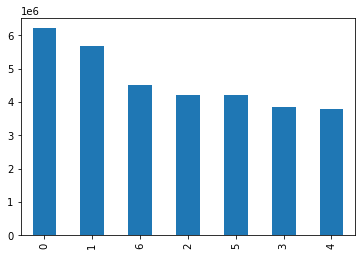

In [4]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

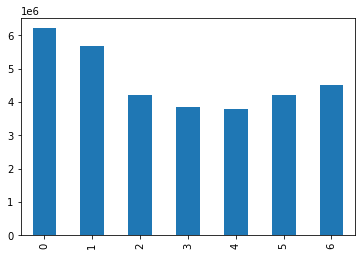

In [5]:
# Using sort_index

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

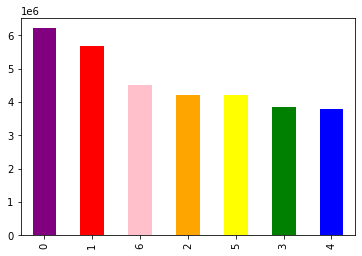

In [6]:
# Add color to bar char

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

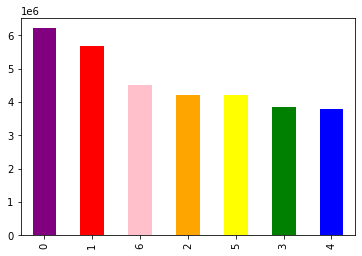

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# Export bar chat

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

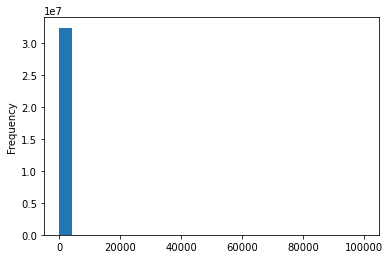

In [11]:
# Create a histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge['prices'].mean()

11.980225638676366

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

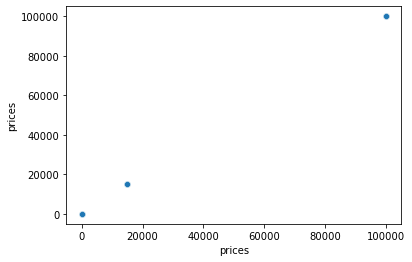

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,user_cumulative_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,loyalty_flag2,loyalty_flag3
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,both,High-range product,Regularly busy,Regularly busy,Most_orders,40,High Spender,108.648299,Regular customer,Frequent Customer
1638,603376,17,22,6,16,5.0,False,21553,3,1,...,both,High-range product,Regularly busy,Regularly busy,Most_orders,40,High Spender,108.648299,Regular customer,Frequent Customer
16534,3264360,135,2,2,21,12.0,False,21553,6,0,...,both,High-range product,Regularly busy,Regularly busy,Most_orders,4,High Spender,1154.792308,New customer,Regular Customer
16540,892534,135,3,0,8,12.0,False,21553,3,1,...,both,High-range product,Busiest day,Busiest days,Most_orders,4,High Spender,1154.792308,New customer,Regular Customer
53712,229704,342,8,1,19,23.0,False,21553,9,0,...,both,High-range product,Regularly busy,Busiest days,Most_orders,16,High Spender,114.426619,Regular customer,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,18,1,9,6.0,False,21553,17,1,...,both,High-range product,Regularly busy,Busiest days,Most_orders,25,High Spender,351.141618,Regular customer,Frequent Customer
32377867,2504315,205818,3,5,15,12.5,False,21553,13,0,...,both,High-range product,Regularly busy,Regularly busy,Most_orders,25,High Spender,170.073770,Regular customer,Regular Customer
32377877,1108388,205818,5,4,5,12.5,False,21553,5,1,...,both,High-range product,Least busy,Least busiest days,Fewest_orders,25,High Spender,170.073770,Regular customer,Regular Customer
32410707,1916142,206049,1,2,17,7.0,True,21553,2,0,...,both,High-range product,Regularly busy,Regularly busy,Most_orders,5,High Spender,938.031250,New customer,Frequent Customer


In [17]:
# Remove outliers (copy to exercise 4.5)

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

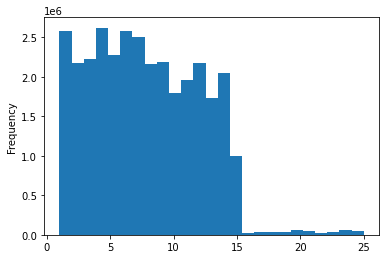

In [21]:
# Create a histogram after removing outliers

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

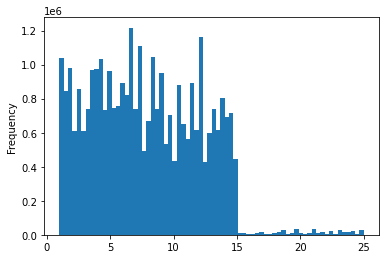

In [22]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [24]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_freq.png'))

In [25]:
# Sampling data

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# Store 70% in big

big = ords_prods_merge[dev]

In [29]:
#Store 30% in small

small = ords_prods_merge[~dev]

In [30]:
len(ords_prods_merge)

32435059

In [31]:
len(big) + len(small)

32435059

In [32]:
# Reduce to only needed columns

df_2 = small[['orders_day_of_week','prices']]

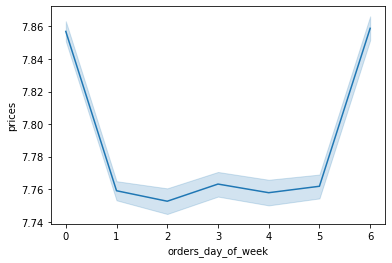

In [34]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')